# Intrusion Detection With Boosting and others

#### Here We have Used 7 Classification Algorithms

##### -- Xgboost  , Support Vector Machines ,  LGB ,Adaboost ,Gradient Boosting ,SVM with Rbf Kernel ,Random Forest Classifier



In [115]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score ,plot_roc_curve,roc_auc_score,roc_curve

In [116]:
data_Train =pd.read_csv(r'G:\Confrence\Detection\test\KDDTrain.txt')

In [117]:
data_Train

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17.1,0.03,0.17.2,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125968,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [118]:
data_Train.describe()

,0,491,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,25,0.17.1,0.03,0.17.2,0.00.6,0.00.7,0.00.8,0.05,0.00.9,20
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,...,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,...,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [119]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent'
            ,'hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root'
            ,'num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login'
            ,'is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate'
            ,'same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
            ,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate'
            ,'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate'
            ,'dst_host_srv_rerror_rate','attack','outcome'])

data_Train.columns=columns

In [120]:
data_Train.drop(columns='outcome',axis=1, inplace=True )

In [121]:
len(data_Train["attack"].unique())

23

In [122]:
attack_n = []
for i in data_Train.attack :
    if i == 'normal':
        attack_n.append("normal")
    else:
        attack_n.append("attack")
data_Train['attack'] = attack_n 

In [123]:
data_Train['attack'].value_counts()

normal    67342
attack    58630
Name: attack, dtype: int64

In [81]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(8, 8), 
           dpi = 1080) 

<Figure size 8640x8640 with 0 Axes>

<Figure size 8640x8640 with 0 Axes>

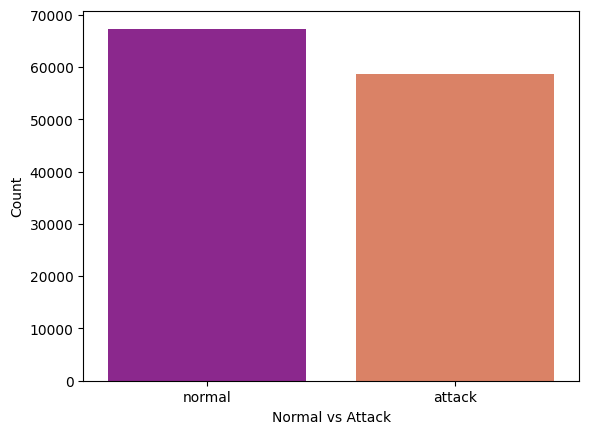

In [82]:
sns.countplot(data_Train.attack , palette = 'plasma')
plt.xlabel("Normal vs Attack")
plt.ylabel("Count")
plt.savefig('1.png', bbox_inches='tight',dpi=1080)


In [83]:
colors = sns.color_palette('pastel')[0:3]

In [84]:
data_Train['protocol_type'].value_counts()

tcp     102688
udp      14993
icmp      8291
Name: protocol_type, dtype: int64

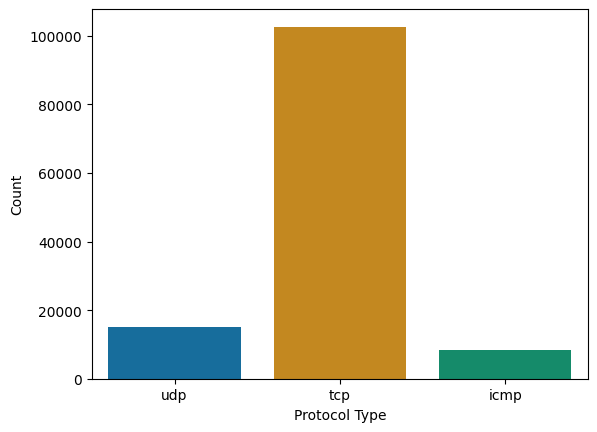

In [85]:
sns.countplot(data_Train[ 'protocol_type'], palette ='colorblind')
plt.xlabel("Protocol Type")
plt.ylabel("Count")
plt.savefig('1.png', bbox_inches='tight',dpi=1080)

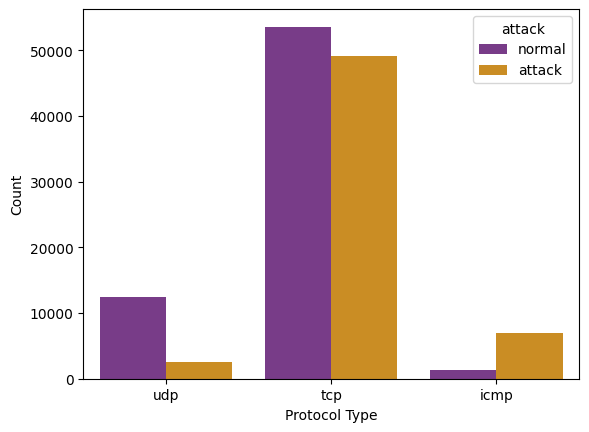

In [86]:
sns.countplot(x='protocol_type',hue='attack' , data = data_Train , palette ='CMRmap')
plt.xlabel("Protocol Type")
plt.ylabel("Count")
plt.savefig('vulnerable.png', bbox_inches='tight',dpi=1080)

In [87]:
from sklearn.preprocessing import LabelEncoder
protocol_type_le = LabelEncoder()
service_le = LabelEncoder()
flag_le = LabelEncoder()

In [88]:
data_Train['protocol_type'] = protocol_type_le.fit_transform(data_Train['protocol_type'])
data_Train['service'] = service_le.fit_transform(data_Train['service'])
data_Train['flag'] = flag_le.fit_transform(data_Train['flag'])

In [89]:
attack_n = []
for i in data_Train.attack :
  if i == 'normal':
    attack_n.append(0)
  else:
    attack_n.append(1)
data_Train['attack'] = attack_n 

In [90]:
data_Train['attack'].value_counts()

0    67342
1    58630
Name: attack, dtype: int64

In [91]:
y = data_Train['attack']
x = data_Train.drop(['attack'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.3, random_state=40)

In [92]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test = scalar.fit_transform(x_test)

# Xgboost 

In [124]:
import xgboost as xgb

xgbmodel = xgb.XGBClassifier()
eval_set=[(x_test,y_test)]
xgbmodel.fit(x_train,y_train,early_stopping_rounds=10,eval_set=eval_set,verbose=True)

[14:33:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.50808
[1]	validation_0-logloss:0.42786
[2]	validation_0-logloss:0.35138
[3]	validation_0-logloss:0.29842
[4]	validation_0-logloss:0.26478
[5]	validation_0-logloss:0.23951
[6]	validation_0-logloss:0.22174
[7]	validation_0-logloss:0.21645
[8]	validation_0-logloss:0.21359
[9]	validation_0-logloss:0.20820
[10]	validation_0-logloss:0.20720
[11]	validation_0-logloss:0.20710
[12]	validation_0-logloss:0.21086
[13]	validation_0-logloss:0.21658
[14]	validation_0-logloss:0.22398
[15]	validation_0-logloss:0.23224
[16]	validation_0-logloss:0.23743
[17]	validation_0-logloss:0.23903
[18]	validation_0-logloss:0.23671
[19]	validation_0-logloss:0.23139
[20]	validation_0-lo

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [125]:
XG_prediction=xgbmodel.predict(x_test)

In [126]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,plot_confusion_matrix
accuracy=accuracy_score(y_test,XG_prediction)
print("Accuracy Score: ",accuracy*100)

Accuracy Score:  93.57006773920406


In [127]:
Labels=["Normal","Attacks"]

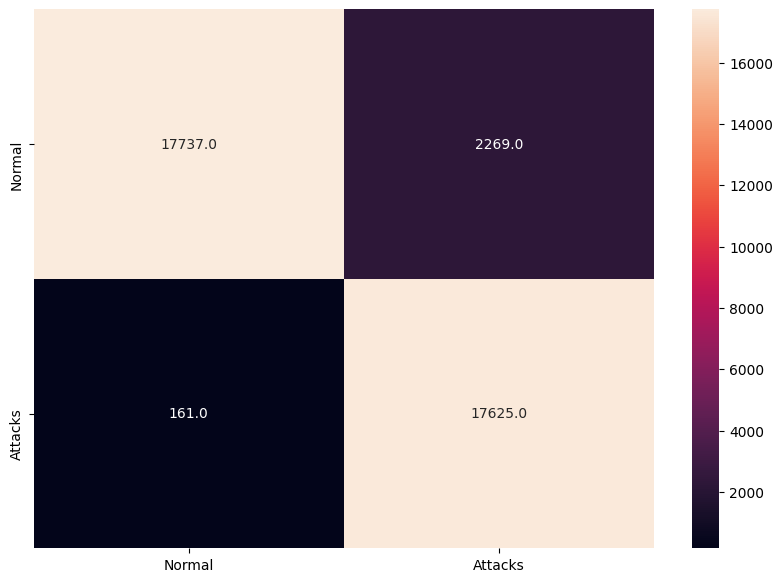

In [97]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = confusion_matrix(y_test,XG_prediction)
df_cm = pd.DataFrame(array, index = [i for i in Labels],
                  columns = [i for i in Labels])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,fmt=".1f")
plt.savefig('XGCONF.png', bbox_inches='tight',dpi=1080)

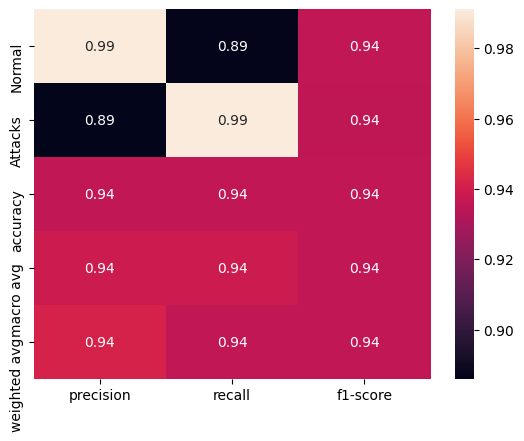

In [98]:
# print("XGBOOST======================================== XGBOOST")
pcol=classification_report(y_test, XG_prediction, target_names=Labels,digits=2,output_dict=True)
sns.heatmap(pd.DataFrame(pcol).iloc[:-1, :].T, annot=True)
plt.savefig('Xgpcol.png', bbox_inches='tight',dpi=1080)

# Support Vector Machines

In [99]:
from sklearn import svm
from sklearn.svm import SVC
lin_svc = svm.LinearSVC().fit(x_train, y_train)
svmpred =lin_svc.predict(x_test)
print( "Linear SVM accuracy  : " + str(np.round(accuracy_score(y_test,svmpred),3)))

Linear SVM accuracy  : 0.955


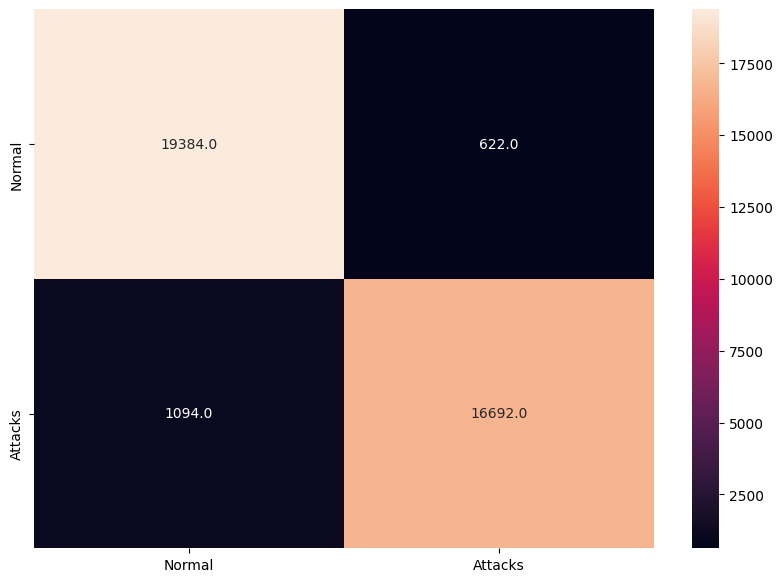

In [100]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = confusion_matrix(y_test,svmpred)
df_cm = pd.DataFrame(array, index = [i for i in Labels],
                  columns = [i for i in Labels])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,fmt=".1f")
plt.savefig('SVMCON.png', bbox_inches='tight',dpi=1080)

SVM ======================================== SVM


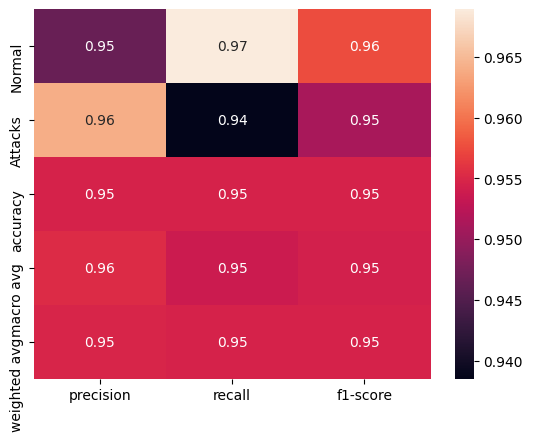

In [101]:
print("SVM ======================================== SVM")
pcol=classification_report(y_test, svmpred, target_names=Labels,digits=2,output_dict=True)
sns.heatmap(pd.DataFrame(pcol).iloc[:-1, :].T, annot=True)
plt.savefig('SVMpcol.png', bbox_inches='tight',dpi=1080)

# Light Gradient Boosted Machine

In [102]:
import lightgbm as lgb
 
# Similarly LGBMRegressor can also be imported for a regression model.
from lightgbm import LGBMClassifier

lgbmodel = LGBMClassifier()
lgbmodel.fit(x_train,y_train)
 
# Predicting the Target variable
lgbpred = lgbmodel.predict(x_test)
accuracy = lgbmodel.score(x_test,y_test)

In [103]:
print("**Accuracy of LGD :",accuracy*100)

**Accuracy of LGD : 93.90611769686707


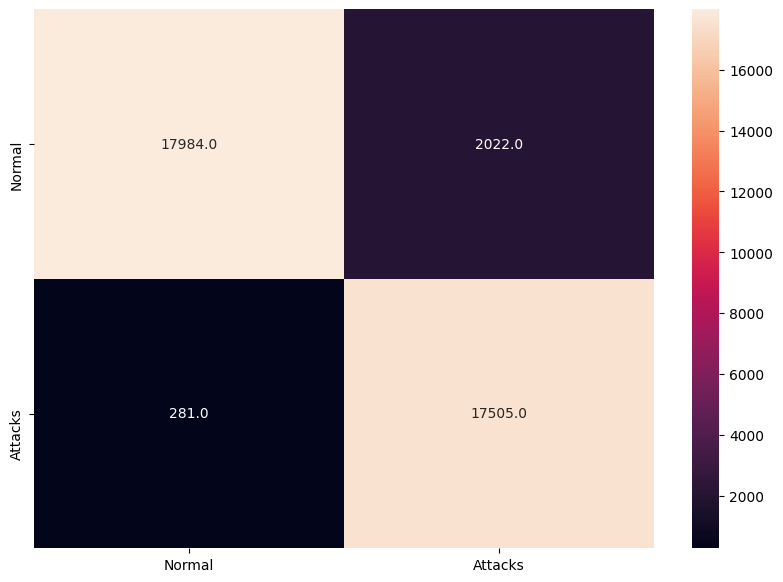

In [104]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = confusion_matrix(y_test,lgbpred)
df_cm = pd.DataFrame(array, index = [i for i in Labels],
                  columns = [i for i in Labels])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,fmt=".1f")
plt.savefig('LGBMCONF.png', bbox_inches='tight',dpi=1080)

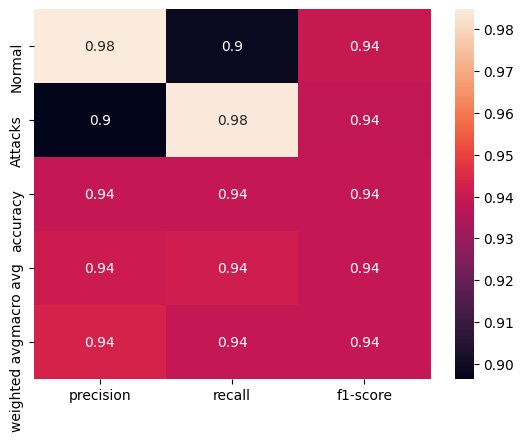

In [105]:
pcol=classification_report(y_test, lgbpred, target_names=Labels,digits=2,output_dict=True)
sns.heatmap(pd.DataFrame(pcol).iloc[:-1, :].T, annot=True)
plt.savefig('LGBM.png', bbox_inches='tight',dpi=1080)

# AdaBoost Algorithm

In [128]:
from sklearn.ensemble import AdaBoostClassifier

In [129]:
ada = AdaBoostClassifier(n_estimators=100,learning_rate=1)
ada.fit(x_train,y_train)
adared =ada.predict(x_test)
print( "AdaBoost Algorithm Accuracy  : " + str(np.round(accuracy_score(y_test,adared),3)*100))

AdaBoost Algorithm Accuracy  : 91.9


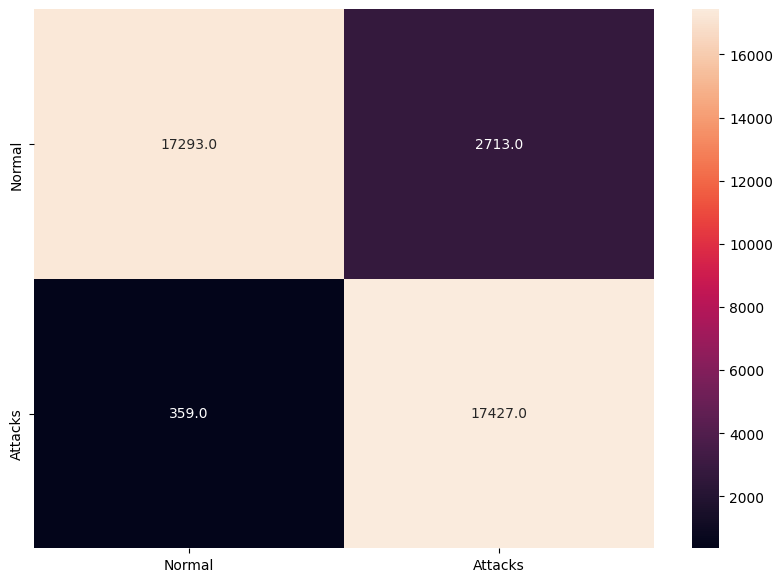

In [130]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = confusion_matrix(y_test,adared)
df_cm = pd.DataFrame(array, index = [i for i in Labels],
                  columns = [i for i in Labels])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,fmt=".1f")
plt.savefig('Adaboost.png', bbox_inches='tight',dpi=1080)

Ada ======================================== Ada


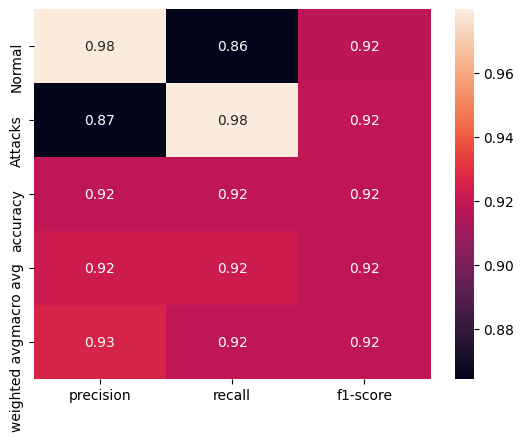

In [131]:
print("Ada ======================================== Ada")
pcol=classification_report(y_test, adared, target_names=Labels,digits=2,output_dict=True)
sns.heatmap(pd.DataFrame(pcol).iloc[:-1, :].T, annot=True)
plt.savefig('AdaboostPcol.png', bbox_inches='tight',dpi=1080)

# Gradient Boosting

In [132]:
from sklearn.ensemble import GradientBoostingClassifier

In [133]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
gb.fit(x_train,y_train)
gbpred =gb.predict(x_test)
print( "AdaBoost Algorithm Accuracy  : " + str(np.round(accuracy_score(y_test,gbpred),3)*100))

AdaBoost Algorithm Accuracy  : 81.6


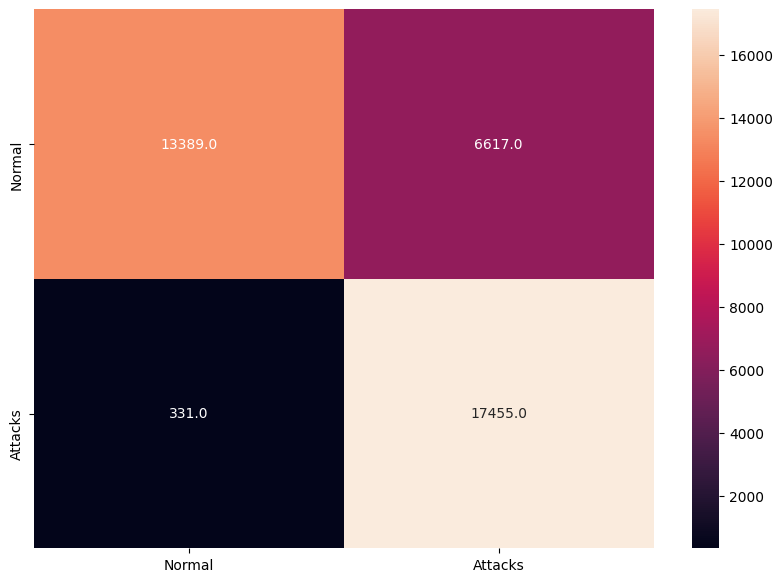

In [134]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = confusion_matrix(y_test,gbpred)
df_cm = pd.DataFrame(array, index = [i for i in Labels],
                  columns = [i for i in Labels])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,fmt=".1f")
plt.savefig('GradientBoost.png', bbox_inches='tight',dpi=1080)

Ada ======================================== Ada


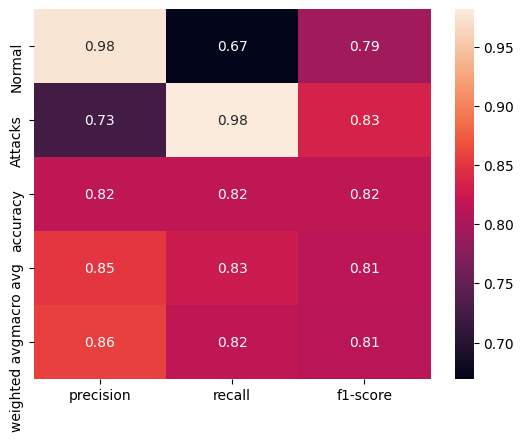

In [135]:
print("Ada ======================================== Ada")
pcol=classification_report(y_test, gbpred, target_names=Labels,digits=2,output_dict=True)
sns.heatmap(pd.DataFrame(pcol).iloc[:-1, :].T, annot=True)
plt.savefig('GboostPcol.png', bbox_inches='tight',dpi=1080)

# Support Vector Machine RBF Kernel

In [ ]:
rbf_svc = svm.SVC(kernel="rbf", gamma=0.5, C=1).fit(x_train, y_train)
Y_pred_rbf =rbf_svc.predict(x_test)
print(rbf_svc.score(x_train, y_train))
print(rbf_svc.score(x_test, y_test))
print("------------------------------------------------")
print( "SVM (kernel: 'rbf')  accuracy  : " + str(np.round(accuracy_score(y_test,Y_pred_rbf),3)))

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = confusion_matrix(y_test,Y_pred_rbf)
df_cm = pd.DataFrame(array, index = [i for i in Labels],
                  columns = [i for i in Labels])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,fmt=".1f")
plt.savefig('Svmrbf.png', bbox_inches='tight',dpi=1080)

In [ ]:
print("Ada ======================================== Ada")
pcol=classification_report(y_test, Y_pred_rbf, target_names=Labels,digits=2,output_dict=True)
sns.heatmap(pd.DataFrame(pcol).iloc[:-1, :].T, annot=True)
plt.savefig('svmrbfpcol.png', bbox_inches='tight',dpi=1080)

In [ ]:
# Random Forest Classifier

In [220]:
from sklearn.ensemble import RandomForestClassifier

In [223]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rfpred=rf.predict(x_test)
print( "Random Forest Classifier  : " + str(np.round(accuracy_score(y_test,rfpred),5)*100))

Random Forest Classifier  : 96.64500000000001


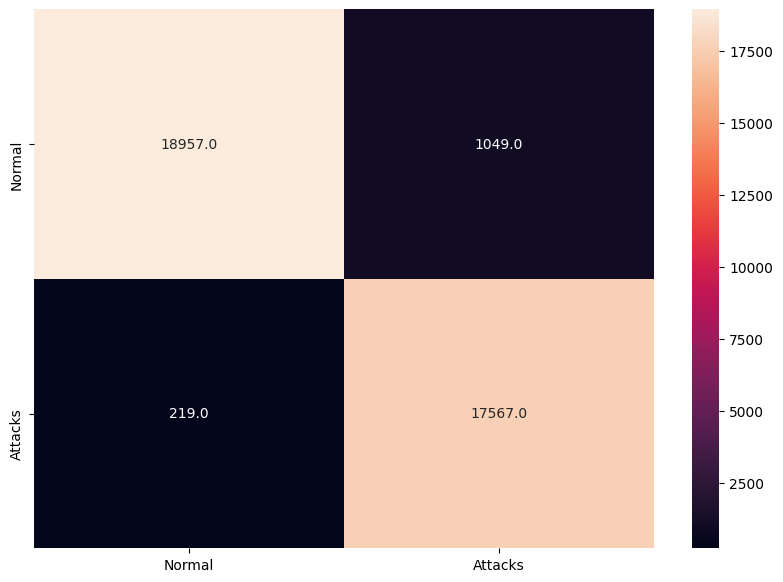

In [224]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = confusion_matrix(y_test,rfpred)
df_cm = pd.DataFrame(array, index = [i for i in Labels],
                  columns = [i for i in Labels])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,fmt=".1f")
plt.savefig('RandomF.png', bbox_inches='tight',dpi=1080)

RF ======================================== RF


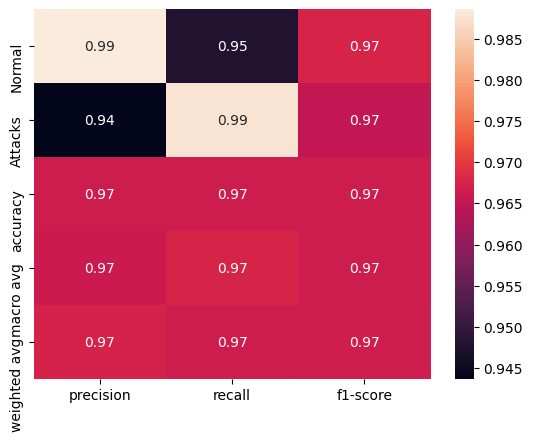

In [225]:
print("RF ======================================== RF")
pcol=classification_report(y_test, rfpred, target_names=Labels,digits=2,output_dict=True)
sns.heatmap(pd.DataFrame(pcol).iloc[:-1, :].T, annot=True)
plt.savefig('RFPcol.png', bbox_inches='tight',dpi=1080)

# Multi Layer Preceptron

In [136]:
from tensorflow import keras

In [205]:
model=keras.Sequential([
    keras.layers.Dense(32,input_shape=(41,),activation="relu",kernel_regularizer=keras.regularizers.L1(0.01)),
    keras.layers.Dense(256,activation="relu"),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(2,activation="softmax")
])


In [206]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [207]:
history=model.fit(x_train, y_train,epochs=10,validation_split=0.1)
model.evaluate(x_test, y_test)

Epoch 1/10
2481/2481 [==============================] - 5s 2ms/step - loss: 0.2505 - accuracy: 0.9771 - val_loss: 0.0826 - val_accuracy: 0.9862
Epoch 2/10
2481/2481 [==============================] - 5s 2ms/step - loss: 0.0844 - accuracy: 0.9836 - val_loss: 0.0914 - val_accuracy: 0.9792
Epoch 3/10
2481/2481 [==============================] - 5s 2ms/step - loss: 0.0777 - accuracy: 0.9842 - val_loss: 0.0853 - val_accuracy: 0.9779
Epoch 4/10
2481/2481 [==============================] - 6s 2ms/step - loss: 0.0751 - accuracy: 0.9846 - val_loss: 0.0629 - val_accuracy: 0.9873
Epoch 5/10
2481/2481 [==============================] - 6s 2ms/step - loss: 0.0731 - accuracy: 0.9844 - val_loss: 0.0732 - val_accuracy: 0.9846
Epoch 6/10
2481/2481 [==============================] - 6s 2ms/step - loss: 0.0730 - accuracy: 0.9845 - val_loss: 0.0660 - val_accuracy: 0.9862
Epoch 7/10
2481/2481 [==============================] - 5s 2ms/step - loss: 0.0717 - accuracy: 0.9848 - val_loss: 0.0627 - val_accuracy:

[0.07440406084060669, 0.980339765548706]

In [184]:
model.save("nn.h5")

In [185]:
keras.utils.plot_model(model, to_file="model_1.png", show_shapes=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


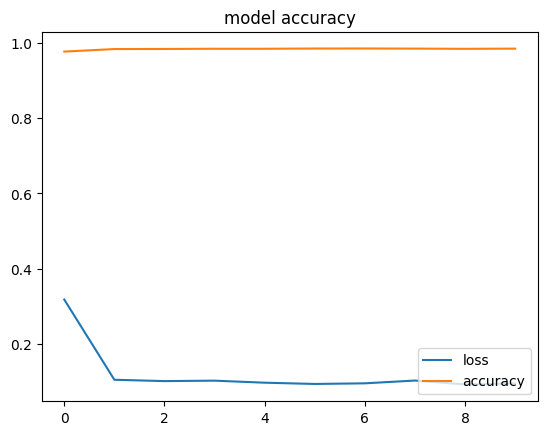

<Figure size 640x480 with 0 Axes>

In [180]:
plt.plot(history.history["loss"])
plt.plot(history.history["accuracy"])
plt.title('model accuracy')
plt.legend(['loss', 'accuracy'], loc='lower right')
plt.show()
plt.savefig('NeuralNet.png', bbox_inches='tight',dpi=1080)

# K Nearest Neighbor

# Comparision of All Algorithms

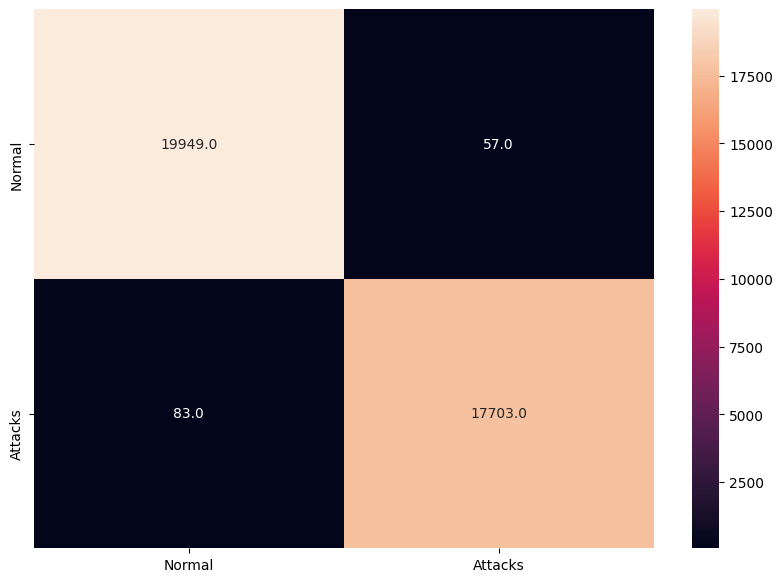

In [213]:
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)
knnpred=neigh.predict(x_test)

array = confusion_matrix(y_test,knnpred)
df_cm = pd.DataFrame(array, index = [i for i in Labels],
                  columns = [i for i in Labels])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,fmt=".1f")
plt.savefig('knn.png', bbox_inches='tight',dpi=1080)


In [214]:
print( "KNN Accuracy  : " + str(np.round(accuracy_score(y_test,knnpred),3)*100))

KNN Accuracy  : 99.6


Knn ======================================== Knn


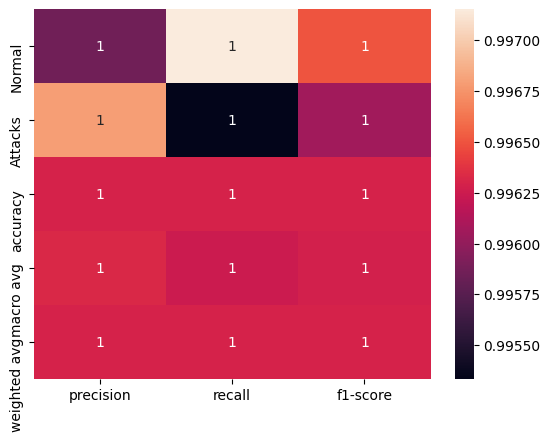

In [219]:
print("Knn ======================================== Knn")
pcol=classification_report(y_test, knnpred, target_names=Labels,digits=2,output_dict=True)
sns.heatmap(pd.DataFrame(pcol).iloc[:-1, :].T, annot=True)
plt.savefig('knnPcol.png', bbox_inches='tight',dpi=1080)

In [ ]:
AccuracyEach=[93.57   ,95.6 ,93.9 , 91.9    ,81.6     ,99.5    ,99.473]
AccuracyLab=["Xgboost","SVM","LGB","AdaBoost","GBoost","SVMrbf","RForest"]

In [226]:
nAccuracyEach=[93.57, 91.9 ,93.9,81.6,96.90]
nAccuracyLab=["Xgboost","AdaBoost","LGB","GBoost","RF"]

In [227]:
Accuracy = pd.DataFrame(
    { 'nAccuracyLab': nAccuracyLab,
        'nAccuracyEach': nAccuracyEach,
    
    })

In [228]:
Accuracy

,nAccuracyLab,nAccuracyEach
0,Xgboost,93.57
1,AdaBoost,91.90
2,LGB,93.90
3,GBoost,81.60
4,RF,96.90


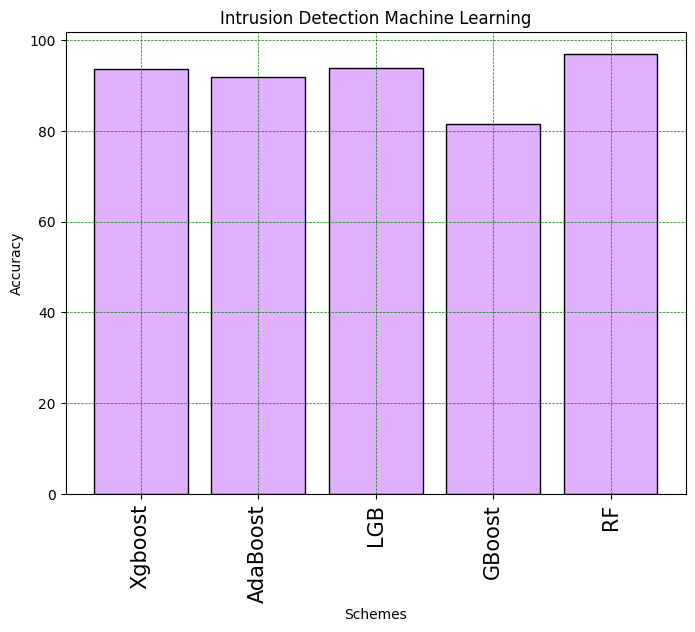

In [229]:
plt.rcdefaults()
f, ax = plt.subplots(figsize=(8,6))
plt.xticks(fontsize=15,rotation=90)
plt.ylabel("Accuracy")
plt.xlabel("Schemes")
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)



plt.title('Intrusion Detection Machine Learning')
plt.bar(nAccuracyLab,nAccuracyEach,color="#E0B0FF",align='center', edgecolor='Black')
#add mini grid ,color dark blue , grid black
plt.savefig('ConF2.png', bbox_inches='tight',dpi=1080)

In [ ]:
# \begin{figure}[h] 
#     \centering
#     \includegraphics[width=10cm, height=8cm]{fig1.jpeg}
#     \caption{\centering Confusion matrics of AdaBoost }
#     \label{fig:ccg}
# \end{figure}

# %-----------------------
# \begin{figure*}[h]
# \centering
# \subfloat[\centering Sub figure 1 name]{\includegraphics[width=0.5\textwidth]{fig1.jpeg}\label{fig:res1}}   
# \hfill
# \subfloat[\centering Sub figure 2]{\includegraphics[width=0.45\textwidth]{fig2.jpeg}\label{fig:res2}}
# \hfill
# \caption{ \centering Performance Evaluation}
# \end{figure*}